In [1]:
import os
import sqlite3
import requests
import json

import matplotlib.pyplot as plt
#import nfts.dataset
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import zeta

## Openseas API request - Import a Single Crypto_Punk Asset NFT

In [2]:
### Token ID:          9591 
### Contract Address:  0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB
### Token Standard:    CryptoPunks
### Blockchain:        Ethereum

In [3]:
# Import a single asset

contract_address = "0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB"
url = "https://api.opensea.io/api/v1/asset/"+contract_address+"/1/"
response = requests.request("GET", url)
response.json()

{'id': 158831,
 'token_id': '1',
 'num_sales': 3,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/7bRocEaoBrWYBX3vThkHj4kAV3b3mKG-Kem85xeT-D8oHpvQ19kcoiBd9mIFeNU0GrwZGvj6Oc5NAEGBSsGlrww',
 'image_preview_url': 'https://lh3.googleusercontent.com/7bRocEaoBrWYBX3vThkHj4kAV3b3mKG-Kem85xeT-D8oHpvQ19kcoiBd9mIFeNU0GrwZGvj6Oc5NAEGBSsGlrww=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/7bRocEaoBrWYBX3vThkHj4kAV3b3mKG-Kem85xeT-D8oHpvQ19kcoiBd9mIFeNU0GrwZGvj6Oc5NAEGBSsGlrww=s128',
 'image_original_url': 'https://www.larvalabs.com/cryptopunks/cryptopunk1.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'CryptoPunk #1',
 'description': None,
 'external_link': 'https://www.larvalabs.com/cryptopunks/details/1',
 'asset_contract': {'address': '0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb',
  'asset_contract_type': 'non-fungible',
  'created_date': '2018-01-23T04:51:38.832339',
  'name': 'CryptoPunks',
  'nft_version': 'unsupported',
 

## Load the Crypto Punks trading dataset

In [4]:
# Read the trading data json file
df = pd.read_json("Data/txn_history-2021-10-07.jsonl", lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [5]:
# Fill nan eth values with cero
df["eth"] = df["eth"].fillna(0)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  167492 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [7]:
#"elnumeroes"+str(punk_id[i])
#para la busqueda de la imagen se necesita import el pillow, append la base de datos en una columna nueva "image_array"
#for punk in df.punk_id
# Get a count of the unique seller ids
print(df["from"].value_counts())

             83844
WrappedC…     2526
0x717403      2246
Pranksy       2110
Hemba         1354
             ...  
0x8adaef         1
0x549506         1
0xc97c66         1
Bitjamin         1
0x15547b         1
Name: from, Length: 6862, dtype: int64


In [8]:
# Get a count of the unique buyer ids
print(df["to"].value_counts())

             118614
WrappedC…      2773
0xc352b5       1070
Hemba          1059
0x00d7c9       1046
              ...  
0x4c343e          1
supahmar…         1
0x53a2b2          1
0xd16b14          1
0x7e9045          1
Name: to, Length: 6831, dtype: int64


In [9]:
# Get a count of the unique Crypto Punk NFT ids
print(df["punk_id"].value_counts())

5272    143
8697    143
3653    141
3914    136
6879    130
       ... 
4651      1
9712      1
3993      1
3701      1
477       1
Name: punk_id, Length: 10000, dtype: int64


In [10]:
# Get a count of the unique transaction types
print(df["txn_type"].value_counts())

Offered            65467
Bid                26808
Sold               18979
Bid Withdrawn      16342
Transfer           14225
Offer Withdrawn    10372
Claimed            10000
(Wrap)              2773
(Unwrap)            2526
Name: txn_type, dtype: int64


In [11]:
# Get a count of the unique Crypto Punk NFT type
print(df["type"].value_counts())

[Male]      104154
[Female]     59873
[Zombie]      2251
[Ape]          787
[Alien]        427
Name: type, dtype: int64


In [12]:
# Get a count of the unique Crypto Punk NFT accesories
print(df["accessories"].value_counts())

[]                                                 421
[Bandana, Regular Shades]                          206
[Bandana, Eye Patch]                               188
[Knitted Cap, Regular Shades]                      187
[Crazy Hair, Regular Shades]                       187
                                                  ... 
[Cap, Medical Mask, Earring]                         1
[Frown, Police Cap, Small Shades, Mole]              1
[Muttonchops, Wild Hair, Earring, Small Shades]      1
[Hoodie, Pipe, Small Shades, Mole]                   1
[Big Shades, Front Beard Dark, Do-rag]               1
Name: accessories, Length: 6701, dtype: int64


In [13]:
# Capture all individual types and accessories and store them in a their respective lists
types = []
accessories_list =[]

# Loop through the dataframe
for row in range(len(df)):

    # Add a new field with the count of accessories
    accessory_count = len(df.at[row,"accessories"])
    df.at[row,"accessory_count"]=accessory_count
    
    # Add each new type description to a list of unique values
    x = df.at[row,"type"]
    if x not in types:
        types.append(x)
    
    # Add each new accessory description to a list of unique values
    for i in df.at[row,"accessories"]:
        
        if i not in accessories_list:
            accessories_list.append(i)

# Print all the unique types
print("There are "+str(len(types))+" distinct types:")
print(types)

There are 5 distinct types:
[['Female'], ['Male'], ['Zombie'], ['Ape'], ['Alien']]


In [14]:
# Print all the unique accessories
print("There are "+str(len(accessories_list))+" distinct accessories:")
print(accessories_list)

There are 87 distinct accessories:
['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk', 'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat', 'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair', 'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard', 'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow', 'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark', 'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde', 'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair', 'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana', 'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars', 'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black', 'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard', 'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap', 'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch', 'Headband', 'Cowboy Hat', 'Tassle Hat', '3D Glasses', 'Mustache', 'Vape', 'Choker', 'Pi

In [15]:
hair_types = [
    'Green Eye Shadow', 
    'Earring', 
    'Blonde Bob', 
    'Smile', 
    'Mohawk', 
    'Wild Hair', 
    'Nerd Glasses', 
    'Pipe', 
    'Big Shades', 
    'Goat', 
    'Purple Eye Shadow', 
    'Half Shaved', 
    'Do-rag', 
    'Wild White Hair', 
    'Spots', 
    'Clown Eyes Blue', 
    'Messy Hair', 
    'Luxurious Beard', 
    'Clown Nose', 
    'Police Cap', 
    'Big Beard', 
    'Blue Eye Shadow', 
    'Black Lipstick', 
    'Clown Eyes Green', 
    'Straight Hair Dark', 
    'Blonde Short', 
    'Purple Lipstick', 
    'Straight Hair Blonde', 
    'Pilot Helmet', 
    'Hot Lipstick', 
    'Regular Shades', 
    'Stringy Hair', 
    'Small Shades', 
    'Frown', 
    'Eye Mask', 
    'Muttonchops', 
    'Bandana', 
    'Horned Rim Glasses', 
    'Crazy Hair', 
    'Classic Shades', 
    'Handlebars', 
    'Mohawk Dark', 
    'Dark Hair', 
    'Peak Spike', 
    'Normal Beard Black', 
    'Cap', 
    'VR', 
    'Frumpy Hair', 
    'Cigarette', 
    'Normal Beard', 
    'Red Mohawk', 
    'Shaved Head', 
    'Chinstrap', 
    'Mole', 
    'Knitted Cap', 
    'Fedora', 
    'Shadow Beard', 
    'Straight Hair', 
    'Hoodie', 
    'Eye Patch', 
    'Headband', 
    'Cowboy Hat', 
    'Tassle Hat', 
    '3D Glasses', 
    'Mustache', 
    'Vape', 
    'Choker', 
    'Pink With Hat', 
    'Welding Goggles', 
    'Vampire Hair', 
    'Mohawk Thin', 
    'Tiara', 
    'Front Beard Dark', 
    'Cap Forward', 
    'Gold Chain', 
    'Purple Hair', 
    'Beanie', 
    'Clown Hair Green', 
    'Pigtails', 
    'Silver Chain', 
    'Front Beard', 
    'Rosy Cheeks', 
    'Orange Side', 
    'Wild Blonde', 
    'Buck Teeth', 
    'Top Hat', 
    'Medical Mask'
]

In [16]:
# Inspect the dataframe for the new accessory count field
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0


In [17]:
df["accessory_count"].value_counts()

3.0    76136
2.0    59639
4.0    22897
1.0     4118
5.0     3745
6.0      455
0.0      421
7.0       81
Name: accessory_count, dtype: int64

<AxesSubplot:>

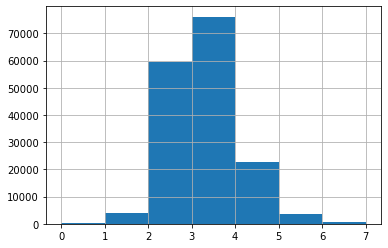

In [18]:
df["accessory_count"].hist(bins=7)

In [19]:
transaction_table = pd.pivot_table(df, values="eth", index=["punk_id"], columns=["txn_type"], aggfunc="count")
transaction_table

#df.pivot(index=["punk_id"], columns=["txn_type"], values="eth")

txn_type,(Unwrap),(Wrap),Bid,Bid Withdrawn,Claimed,Offer Withdrawn,Offered,Sold,Transfer
punk_id,,,,,,,,,
0,NaN,NaN,22.0,11.0,1.0,NaN,3.0,3.0,1.0
1,NaN,NaN,18.0,10.0,1.0,6.0,20.0,3.0,5.0
2,NaN,NaN,17.0,11.0,1.0,NaN,NaN,NaN,1.0
3,NaN,NaN,12.0,4.0,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,6.0,5.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,1.0
9996,NaN,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN
9997,3.0,3.0,10.0,6.0,1.0,2.0,8.0,2.0,8.0


In [20]:
# Sort transaction table by most sold
#buscar que significa wrap y unwrap!!
transaction_table.sort_values(by=['Sold'], ascending=False, inplace=True)
transaction_table.head(60)

txn_type,(Unwrap),(Wrap),Bid,Bid Withdrawn,Claimed,Offer Withdrawn,Offered,Sold,Transfer
punk_id,,,,,,,,,
8970,2.0,2.0,2.0,2.0,1.0,6.0,36.0,21.0,3.0
5575,4.0,4.0,8.0,4.0,1.0,1.0,23.0,19.0,7.0
7072,1.0,1.0,8.0,6.0,1.0,7.0,34.0,17.0,2.0
3914,1.0,1.0,18.0,11.0,1.0,11.0,73.0,17.0,3.0
9117,2.0,2.0,5.0,3.0,1.0,8.0,35.0,16.0,6.0
8586,8.0,8.0,7.0,5.0,1.0,10.0,25.0,16.0,10.0
8508,2.0,2.0,4.0,4.0,1.0,14.0,27.0,16.0,4.0
2937,2.0,2.0,1.0,NaN,1.0,NaN,31.0,15.0,4.0
6989,3.0,3.0,7.0,3.0,1.0,12.0,58.0,15.0,5.0


In [21]:
import networkx as nx

In [22]:
# Create a list for the network edges using the "to" and "from" fields
print(df["txn_type"].value_counts())

Offered            65467
Bid                26808
Sold               18979
Bid Withdrawn      16342
Transfer           14225
Offer Withdrawn    10372
Claimed            10000
(Wrap)              2773
(Unwrap)            2526
Name: txn_type, dtype: int64


In [23]:
# Create a dataframe of only closed deals
firm_deals_df = df[(df["txn_type"]=="Sold") | (df["txn_type"]=="Transfer")]
firm_deals_df

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
22,Sold,0xf5099e,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
29,Transfer,0xa0a59c,0xf5099e,2017-07-07,2017-07-07,larvalabs,0.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
30,Sold,0x00d7c9,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
37,Sold,0xc352b5,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3.0
51,Transfer,0xcf6165,0xb88f61,2020-11-30,2020-11-30,larvalabs,0.00,1,None,None,[Male],"[Smile, Mohawk]",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167398,Transfer,TJ2010,0x0b87ca,2020-09-22,2020-09-22,larvalabs,0.00,9997,None,None,[Zombie],"[Front Beard, Cap Forward]",2.0
167414,Sold,0xcfd9cc,0xef764b…,2021-08-11,2021-08-11,larvalabs,110.00,9998,None,None,[Female],"[Wild White Hair, Black Lipstick, Clown Eyes G...",3.0
167433,Sold,TokenAng…,0xcfd9cc,2021-03-03,2021-03-03,larvalabs,38.00,9998,None,None,[Female],"[Wild White Hair, Black Lipstick, Clown Eyes G...",3.0
167437,Sold,cyberpnk…,TokenAng…,2020-12-27,2020-12-27,larvalabs,15.00,9998,None,None,[Female],"[Wild White Hair, Black Lipstick, Clown Eyes G...",3.0


In [24]:
#network_df = pd.DataFrame({"node_edge":list(zip(firm_deals_df["from"] , firm_deals_df["to"])),"node_weight":firm_deals_df["eth"]})
network_df = pd.DataFrame({"from_to":list(zip(firm_deals_df["from"] , firm_deals_df["to"])), "source":firm_deals_df["from"],"target":firm_deals_df["to"],"node_weight":firm_deals_df["eth"]})
network_df

,from_to,source,target,node_weight
22,"(0xf5099e, 0xe08c32)",0xf5099e,0xe08c32,25.00
29,"(0xa0a59c, 0xf5099e)",0xa0a59c,0xf5099e,0.00
30,"(0x00d7c9, 0xa0a59c)",0x00d7c9,0xa0a59c,1.60
37,"(0xc352b5, 0x00d7c9)",0xc352b5,0x00d7c9,0.98
51,"(0xcf6165, 0xb88f61)",0xcf6165,0xb88f61,0.00
...,...,...,...,...
167398,"(TJ2010, 0x0b87ca)",TJ2010,0x0b87ca,0.00
167414,"(0xcfd9cc, 0xef764b…)",0xcfd9cc,0xef764b…,110.00
167433,"(TokenAng…, 0xcfd9cc)",TokenAng…,0xcfd9cc,38.00
167437,"(cyberpnk…, TokenAng…)",cyberpnk…,TokenAng…,15.00


In [25]:
# Fill nan values with cero
network_df["node_weight"] = network_df["node_weight"].fillna(0)
network_df

,from_to,source,target,node_weight
22,"(0xf5099e, 0xe08c32)",0xf5099e,0xe08c32,25.00
29,"(0xa0a59c, 0xf5099e)",0xa0a59c,0xf5099e,0.00
30,"(0x00d7c9, 0xa0a59c)",0x00d7c9,0xa0a59c,1.60
37,"(0xc352b5, 0x00d7c9)",0xc352b5,0x00d7c9,0.98
51,"(0xcf6165, 0xb88f61)",0xcf6165,0xb88f61,0.00
...,...,...,...,...
167398,"(TJ2010, 0x0b87ca)",TJ2010,0x0b87ca,0.00
167414,"(0xcfd9cc, 0xef764b…)",0xcfd9cc,0xef764b…,110.00
167433,"(TokenAng…, 0xcfd9cc)",TokenAng…,0xcfd9cc,38.00
167437,"(cyberpnk…, TokenAng…)",cyberpnk…,TokenAng…,15.00


In [26]:
firm_deals_df[(firm_deals_df["accessory_count"]== 6)]

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
7705,Transfer,sov,sov.eth,2021-04-25,2021-04-25,larvalabs,0.00,755,None,None,[Female],"[Mole, Black Lipstick, Clown Eyes Green, Earri...",6.0
7712,Sold,0xc352b5,sov,2017-08-13,2017-08-13,larvalabs,1.40,755,None,None,[Female],"[Mole, Black Lipstick, Clown Eyes Green, Earri...",6.0
22375,Transfer,0xc05488,0xbcb8c5,2021-08-08,2021-08-08,larvalabs,0.00,1839,None,None,[Male],"[Cigarette, Mustache, Earring, Nerd Glasses, K...",6.0
22376,Sold,Pranksy,0xc05488,2021-03-12,2021-03-12,larvalabs,360.00,1839,None,None,[Male],"[Cigarette, Mustache, Earring, Nerd Glasses, K...",6.0
22388,Sold,0xfba169,Pranksy,2021-02-28,2021-02-28,larvalabs,65.00,1839,None,None,[Male],"[Cigarette, Mustache, Earring, Nerd Glasses, K...",6.0
27606,Transfer,DANNY,0x1da533,2020-06-02,2020-06-02,larvalabs,0.00,2202,None,None,[Female],"[Mole, Choker, Straight Hair, Hot Lipstick, Cl...",6.0
27611,Sold,0xc46280…,DANNY,2020-05-22,2020-05-22,larvalabs,15.00,2202,None,None,[Female],"[Mole, Choker, Straight Hair, Hot Lipstick, Cl...",6.0
27619,Transfer,ark1,0xc46280…,2019-08-06,2019-08-06,larvalabs,0.00,2202,None,None,[Female],"[Mole, Choker, Straight Hair, Hot Lipstick, Cl...",6.0
27620,Transfer,Zieg,ark1,2019-07-27,2019-07-27,larvalabs,0.00,2202,None,None,[Female],"[Mole, Choker, Straight Hair, Hot Lipstick, Cl...",6.0
27627,Transfer,Spilliae…,Zieg,2017-08-09,2017-08-09,larvalabs,0.00,2202,None,None,[Female],"[Mole, Choker, Straight Hair, Hot Lipstick, Cl...",6.0


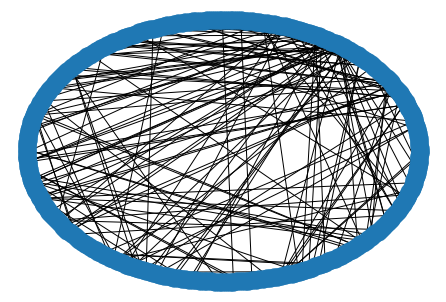

In [27]:
G = nx.from_pandas_edgelist(firm_deals_df[(firm_deals_df["accessory_count"]==5)],
                           source = "from",
                           target = "to",
                           edge_attr = "eth")

nx.draw_circular(G)

In [28]:
nx.draw_random(G)

NetworkXError: random_state_index is incorrect

In [ ]:
summary_df = network_df.groupby("from_to").count()
top_df = summary_df.sort_values(["source"], ascending=False)
top_df

In [ ]:
top_df['source'].plot()

In [ ]:
len(df)